In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from IPython.display import display, Markdown
import warnings

warnings.filterwarnings('ignore')
# mpl.rc('text', usetex=True)
mpl.rc('font', family='Arial')
mpl.rc('font',size = 6)
mpl.rc('mathtext',fontset = 'stix')
mpl.rc('xtick', labelsize=4)
mpl.rc('ytick', labelsize=4)
# mpl.rc('ytick', majorsize=1)
mpl.rc('axes', labelsize=5)
mpl.rc('axes', labelpad=1)
mpl.rc('axes', titlesize=6)
mpl.rc('axes', linewidth=0.5)
mpl.rc('figure', figsize=(8/2.54, 2.8/2.54))
mpl.rc('figure', dpi=400)
mpl.rc('legend',frameon = False)

mpl.rc('savefig',pad_inches = 0.01)


cm_number = 15
cm = plt.cm.get_cmap("Purples")
color = ["#E3738B", "#8CA5EA", "#713948", "#495373", "#FFE8CE","#F9D5DD", "#DCE4FA"]
Colors = [cm(1. / (cm_number - 1) * i) for i in range(0, cm_number)]

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
import sys
sys.path.append("../Model")
import Model
from sympy import symbols, sin, cos

library = [
    lambda x:x[0],
    lambda x:x[0]*x[0],
    lambda x:x[0]*x[0]*x[0],
    lambda x:x[0]*x[0]*x[0]*x[0],
    lambda x:x[0]*x[0]*x[0]*x[0]*x[0],
    lambda x:x[1],
    lambda x:x[1]*x[1],
    lambda x:x[1]*x[1]*x[1],
    lambda x:x[1]*x[1]*x[1]*x[1],
    lambda x:x[1]*x[1]*x[1]*x[1]*x[1],
    lambda x:x[0]*x[1],
    lambda x:x[0]*x[0]*x[1],
    lambda x:x[0]*x[1]*x[1],
    lambda x:x[0]*x[0]*x[0]*x[1],
    lambda x:x[0]*x[0]*x[1]*x[1],
    lambda x:x[0]*x[1]*x[1]*x[1],
    lambda x:x[0]*x[0]*x[0]*x[0]*x[1],
    lambda x:x[0]*x[0]*x[0]*x[1]*x[1],
    lambda x:x[0]*x[0]*x[1]*x[1]*x[1],
    lambda x:x[0]*x[1]*x[1]*x[1]*x[1],
    
]
library_name = [
    lambda x:x[0],
    lambda x:x[0]+x[0],
    lambda x:x[0]+x[0]+x[0],
    lambda x:x[0]+x[0]+x[0]+x[0],
    lambda x:x[0]+x[0]+x[0]+x[0]+x[0],
    lambda x:x[1],
    lambda x:x[1]+x[1],
    lambda x:x[1]+x[1]+x[1],
    lambda x:x[1]+x[1]+x[1]+x[1],
    lambda x:x[1]+x[1]+x[1]+x[1]+x[1],
    lambda x:x[0]+x[1],
    lambda x:x[0]+x[0]+x[1],
    lambda x:x[0]+x[1]+x[1],
    lambda x:x[0]+x[0]+x[0]+x[1],
    lambda x:x[0]+x[0]+x[1]+x[1],
    lambda x:x[0]+x[1]+x[1]+x[1],
    lambda x:x[0]+x[0]+x[0]+x[0]+x[1],
    lambda x:x[0]+x[0]+x[0]+x[1]+x[1],
    lambda x:x[0]+x[0]+x[1]+x[1]+x[1],
    lambda x:x[0]+x[1]+x[1]+x[1]+x[1], 
]
dim = 1

In [4]:
summary_info = pd.read_excel("./Data/summary.xlsx")

U000
U216
U300


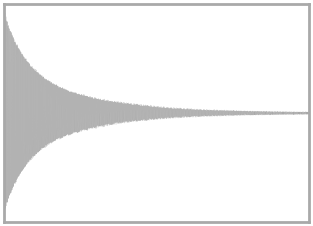

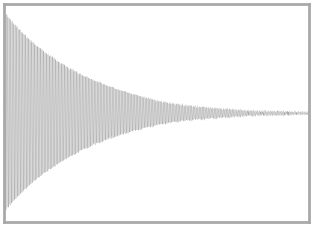

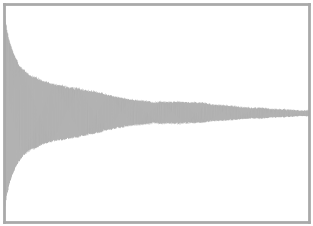

In [5]:
Z2S = summary_info[summary_info["VIV exist"] == "No"]
color_c = "#A9A9A9"
for i in range(len(Z2S)):
    filename = Z2S["Filename"].iloc[i][:4]
    print(filename)
    datadir = "./data/%s_B2S.csv"%filename
    data = pd.read_csv(datadir)
    t_testing = np.array(data['t'])
    y_testing = np.array(data['x'])
    fig,ax = plt.subplots(figsize = (2.5/2.54,1.8/2.54))
    plt.plot(t_testing,y_testing, lw = 0.04,color = color_c)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0,t_testing[-1])
    ax.spines['top'].set_color(color_c)
    ax.spines['right'].set_color(color_c)
    ax.spines['bottom'].set_color(color_c)
    ax.spines['left'].set_color(color_c)
    plt.ylim(-15,15)
    plt.savefig("Fig/Free vibration/%s_Data.svg"%filename,dpi = 600,bbox_inches="tight")

In [6]:
sparse_threshold = 1e-2
stop_tolerance = 1e-3
step_tolerance = 1e-4
w_A2b = 1
smooth_window = 1

In [7]:
frequencys = []
Xs = []
ys = []
initial_states = []
Z2S = summary_info[summary_info["VIV exist"] == "No"]
for i in range(len(Z2S)):
    filename = Z2S["Filename"].iloc[i][:4]
    print(filename)
    datadir = "./data/%s_B2S.csv"%filename
    data = pd.read_csv(datadir)
    t_testing = np.array(data['t'])
    y_testing = np.array(data['x'])
    N = len(t_testing)
    t = t_testing[:N//2]
    y = y_testing[:N//2]
    T = t[-1]
    initial_states.append([y[0], 0])
    model = Model.WeakNO(dim,library,library_name)
    model.Get_frequency(y.reshape(-1,1),t)
    frequencys.append(model.frequencys[0])
    model.Get_Evolution(smooth_window = 1,height = 0.01)
    model.Library_rebuild()
    y = np.zeros([len(model.t_evolutions) - smooth_window+1,2])
    X = np.zeros([len(model.t_evolutions) - smooth_window+1,2,len(model.library)])
    for j in range(2):
        for n in range(len(model.library)):
            X[:,j,n] = Model.moving_average(model.Phi[:,j,n,0],smooth_window)
    Xs.append(X)
    model.dot_evolution(2)
    
    for j in range(2):
        y[:,j] = Model.moving_average(model.dot[0][:,j],smooth_window)
    ys.append(y)

U000
U216
U300


In [8]:
Xi = Model.Group_OMP(ys,
                Xs,
                sparse_threshold = sparse_threshold,
                stop_tolerance = stop_tolerance,
                step_tolerance = step_tolerance,
                w_A2b = w_A2b
               )

In [9]:
# print governing equations EvLOWN learning
x_base = ['x',"x'"]

def equation_print(Xi,x_base,frequency):
    s = "x'' + "
    for i in range(len(Xi)):
        if i == 0 :
            xi = frequency**2 + Xi[i]
        else:
            xi = Xi[i]
        if np.abs(xi)>0:
            
            s+='%e%s + '%(xi, library_name[i](x_base))
    s = s[:-3]
    s += ' = 0'
    return s

for i in range(len(Z2S)):
    filename = Z2S["Filename"].iloc[i][:4]
    print(filename)
    equation = equation_print(Xi[i], x_base, frequencys[i])
    print(equation)

U000
x'' + 1.629765e+02x + -1.158017e-02xxx + 3.104077e-02x' + 3.748394e-06x'x'x' + -9.043132e-11x'x'x'x'x' = 0
U216
x'' + 1.629134e+02x + -5.370864e-03xxx + 4.486090e-02x' + -1.398381e-06x'x'x' + 5.456389e-11x'x'x'x'x' = 0
U300
x'' + 1.664862e+02x + -1.314784e-02xxx + 5.394632e-04x' + 1.316266e-05x'x'x' + -3.081206e-10x'x'x'x'x' = 0


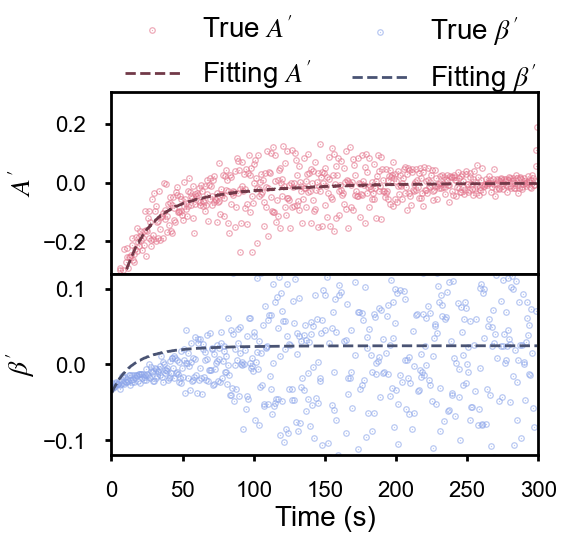

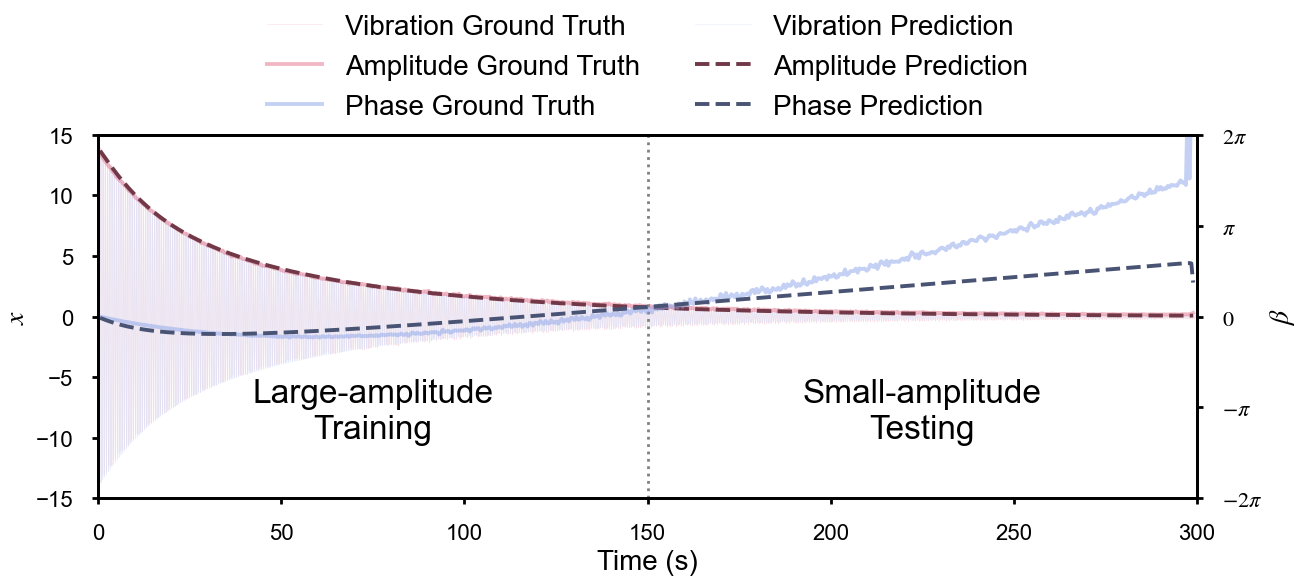

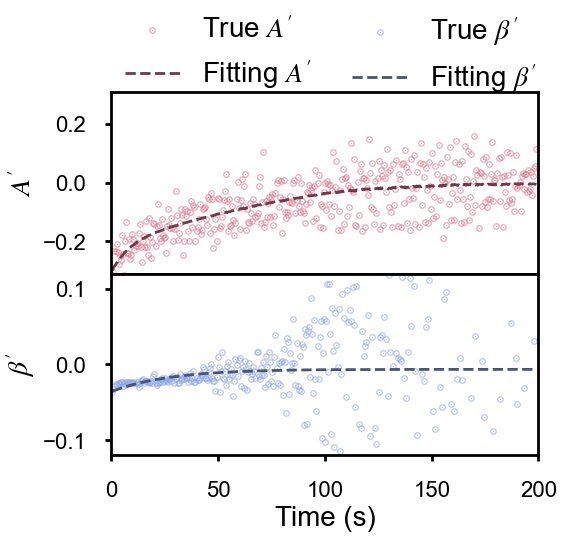

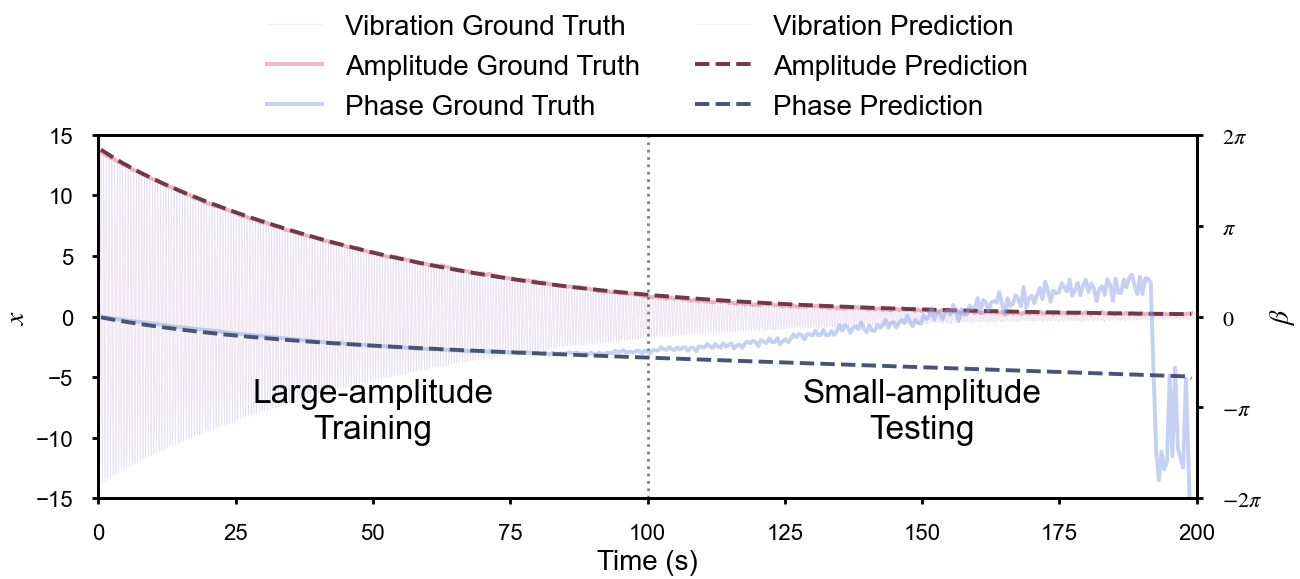

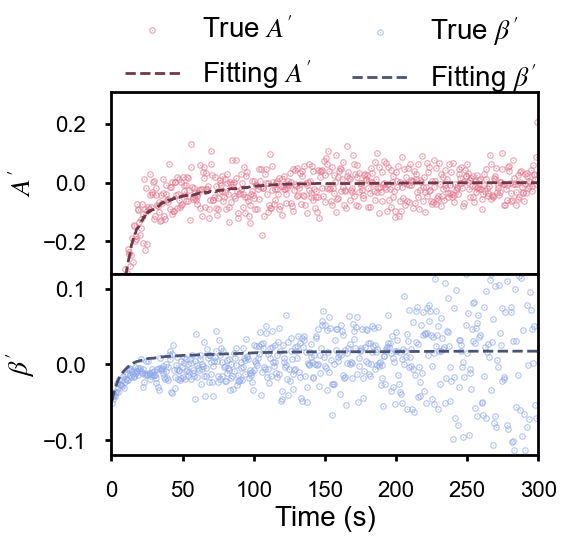

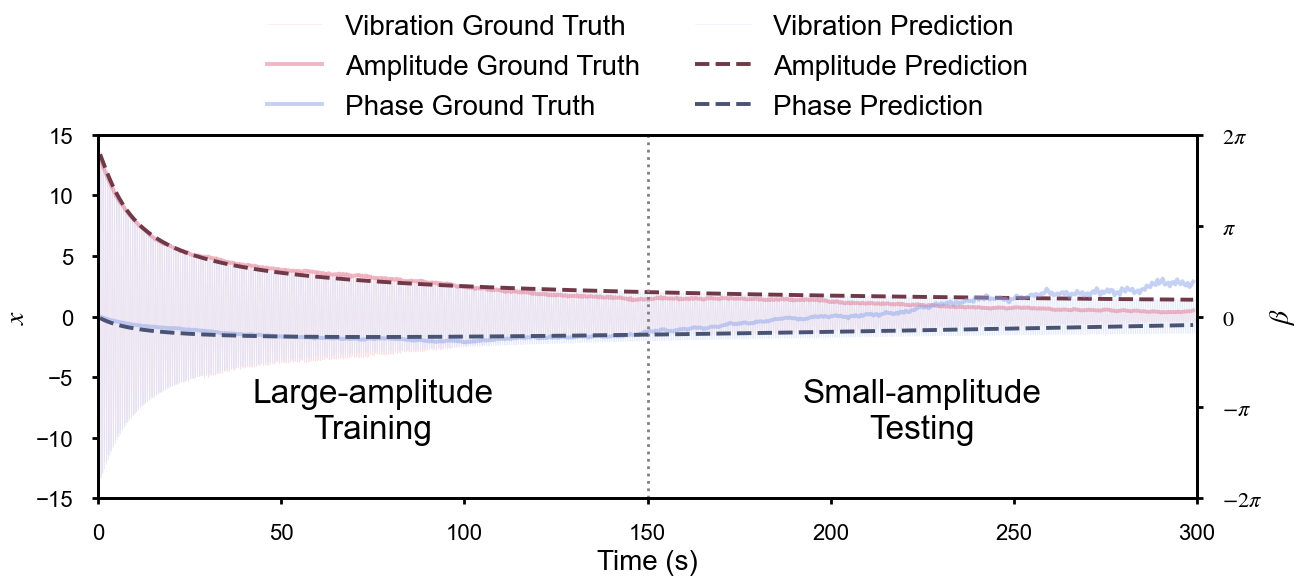

In [14]:
# Validate on trainning set
for i in range(len(Z2S)):
    frequency_result = frequencys[i]
    Xi_result = Xi[i]
    # print(Xi_result)
    filename = Z2S["Filename"].iloc[i][:4]
    # print(filename)
    datadir = "./data/%s_B2S.csv"%filename
    data = pd.read_csv(datadir)
    t = np.array(data['t'])
    y = np.array(data['x'])
    T = t[-1]
    initial_state = [y[0], 0]
    model = Model.WeakNO(dim,library,library_name)
    model.Get_frequency(y.reshape(-1,1),t)
    # print("Identifed result: %.4f"%(model.frequencys[0]**2))
    model.Get_Evolution(smooth_window = 1,height = 0.01)
    dt = model.t_evolutions[1] - model.t_evolutions[0]
    fig,ax = plt.subplots(2,1,figsize = (3.5/2.54,3/2.54))
    # ax0 = plt.subplot(221)
    # ax1 = plt.subplot(223)
    # ax = [ax0,ax1]
    plt.subplots_adjust(hspace = 0)
    model.Library_rebuild()
    ax[0].tick_params(direction='out',width = 0.5,length = 1)
    ax[1].tick_params(direction='out',width = 0.5,length = 1)
    ax[0].scatter(model.t_evolutions[:],np.gradient(model.evolutions[0,0,:],dt,edge_order=2)[:], s=0.05,alpha = 0.6,color = color[0],label = r"True $A'$")
    ax[0].plot(model.t_evolutions[:],np.dot(model.Phi[:,0,:,0],Xi_result),  lw = 0.5,alpha = 1,color = color[2],ls = "--",label = r"Fitting $A'$")
    ax[1].scatter(model.t_evolutions[:],np.gradient(model.evolutions[1,0,:],dt,edge_order=2)[:], s=0.05,alpha = 0.6,color = color[1],label = r"True $\beta'$")
    ax[1].plot(model.t_evolutions[:],np.dot(model.Phi[:,1,:,0],Xi_result),  lw = 0.5,alpha = 1,color = color[3],ls = "--",label = r"Fitting $\beta'$")
    ax[0].set_ylim(-.31,.31)
    ax[1].set_ylim(-.12,.12)
    ax[0].set_xlim(0,T)
    ax[1].set_xlim(0,T)
    ax[0].set_ylabel(r"$A'$")
    ax[1].set_ylabel(r"$\beta'$")
    ax[1].set_xlabel("Time (s)")
    ax[0].set_xticks([])
    ax[0].legend(loc="upper center" ,fontsize = 5, bbox_to_anchor = (0.25,1.55))
    ax[1].legend(loc="upper center" ,fontsize = 5, bbox_to_anchor = (0.78,2.56))
    plt.savefig("Fig/Vortex induced vibration/%s_EvolutionGroup.svg"%filename,dpi = 600,transparent = True,bbox_inches="tight")
    def WND_model(x,t):
        Phi = np.zeros(len(model.library))
        for j in range(len(model.library)):
            Phi[j] = model.library[j](x)
        dxdt = [x[1], -frequency_result**2*x[0]-np.sum(Phi*Xi_result)]
        return dxdt
    WND_predict = odeint(WND_model, y0 = [14,0],t = t) 
    model_GT = Model.WeakNO(dim,library,library_name)
    model_GT.Get_frequency(y.reshape(-1,1),t)
    fre = model_GT.frequencys[0]
    model_GT.Get_Evolution(smooth_window = 1)
    GT_Amplitude = model_GT.evolutions[0,0,:]
    GT_Phase = model_GT.evolutions[1,0,:]
    GT_Phase = GT_Phase - GT_Phase[0]
    GT_evolutions = model_GT.t_evolutions[:]
    model_PRE = Model.WeakNO(dim,library,library_name)
    predict = WND_predict[:,0]
    predict = predict.reshape(-1,1)
    model_PRE.Get_frequency(predict,t)
    # model_PRE.frequencys[0] = frequency_result
    # print(fre)
    model_PRE.Get_Evolution(smooth_window = 1)
    
    PRE_Amplitude = model_PRE.evolutions[0,0,:]
    PRE_Phase = model_PRE.evolutions[1,0,:]
    PRE_phase = PRE_Phase - PRE_Phase[0]
    PRE_evolutions = model_PRE.t_evolutions[:]
    fig,ax = plt.subplots(figsize = (9/2.54,3/2.54))
    plt.subplots_adjust(wspace = 0.02)
    ax.tick_params(direction='out',width = 0.5,length = 1)
    
    

    color = ["#E3738B", "#8CA5EA", "#713948", "#495373", "#FFE8CE","#F9D5DD", "#DCE4FA"]
    # ax = axes[0]
    ax2 = ax.twinx()
    ax2.tick_params(direction='out',width = 0.5,length = 1)
    ax.set_ylim(-15,15)
    ax2.set_yticks(np.linspace(-2*np.pi,2*np.pi,5))
    ax2.set_yticklabels([r"$-2\pi$",r'$-\pi$','$0$','$\pi$',r'$2\pi$'])
    ax.set_xlim(0,T)
    ax2.set_ylim(-2*np.pi, 2*np.pi)
    ax.set_xlabel("Time (s)")
    # ax.set_xticks([])
    ax.set_ylabel(r"$x$",color = "black")
    ax2.set_ylabel(r"$\beta$")
    
    ax.plot([T,T],[-15,15], lw = .5,ls = ':',color = "gray")
    ln1 = ax.plot(t,y,lw = 0.1,alpha = 0.8,color = color[5],label = "Vibration Ground Truth")
    ln2 = ax.plot(t,predict,lw = 0.1,alpha = 0.7,color = color[6],ls = '-',label = "Vibration Prediction")
    ln3 = ax.plot(GT_evolutions, GT_Amplitude, ls = '-', color = color[0],lw = 0.7, alpha = 0.5,label = "Amplitude Ground Truth")
    ln4 = ax.plot(PRE_evolutions, PRE_Amplitude, ls = '--', color = color[2],lw = 0.7, alpha = 1,label = "Amplitude Prediction")
    # ax.plot(t[:-bias],y_pre[bias:].reshape(-1) - WND_predict[:-bias,0], lw = 0.05,color = 'red')
    ax.plot([T/2,T/2],[-15,15], lw = .5,ls = ':',color = "gray")
    ln5 = ax2.plot(GT_evolutions, GT_Phase, ls = '-', color = color[1],lw = 0.7, alpha = 0.5,label = "Phase Ground Truth")
    ln6 = ax2.plot(PRE_evolutions, PRE_Phase, ls = '--', color = color[3],lw = 0.7, alpha = 1,label = "Phase Prediction")
    ax.text(s = "Large-amplitude\nTraining", x = T/4, y = -10,ha = 'center')
    ax.text(s = "Small-amplitude\nTesting", x = T*3/4,y = -10,ha = 'center')
    lns = ln1 + ln3 + ln5 + ln2 +ln4 + ln6
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc="upper center" ,ncols = 2, fontsize = 5, bbox_to_anchor = (0.5,1.4))
    plt.savefig("Fig/Vortex induced vibration/%s_TrainingGroup.svg"%filename,dpi = 600,transparent = True,bbox_inches="tight")

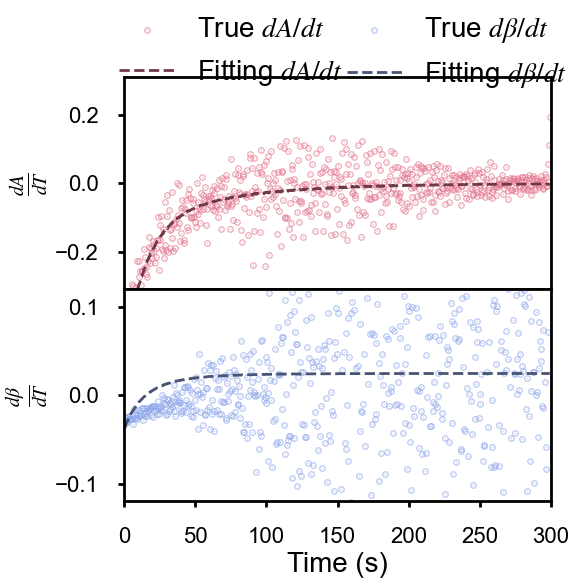

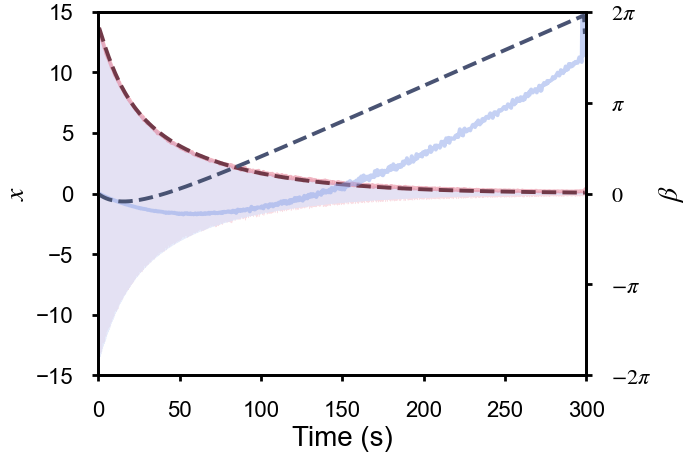

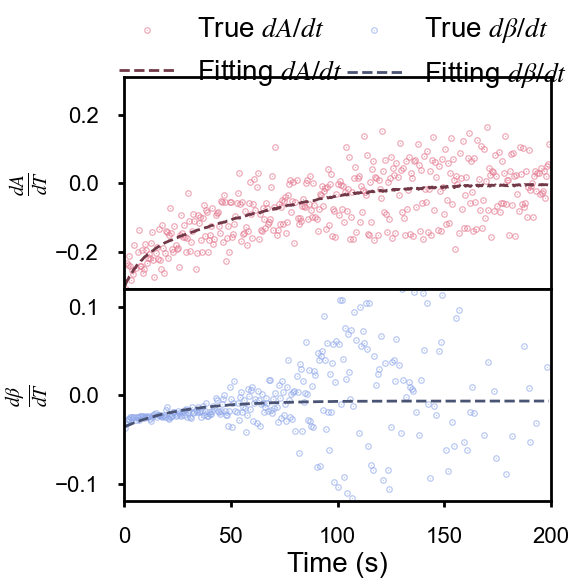

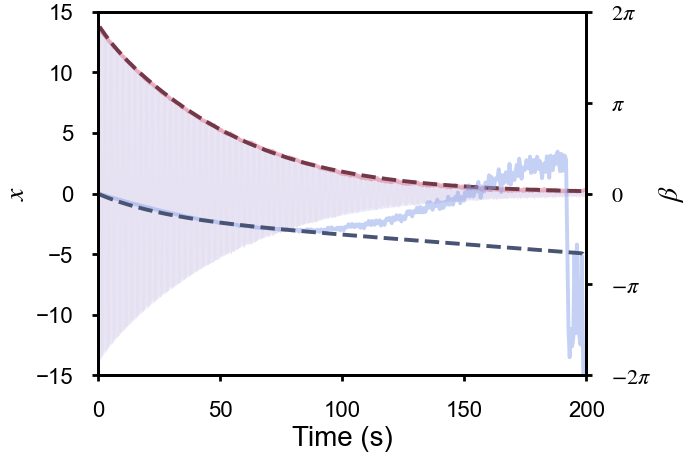

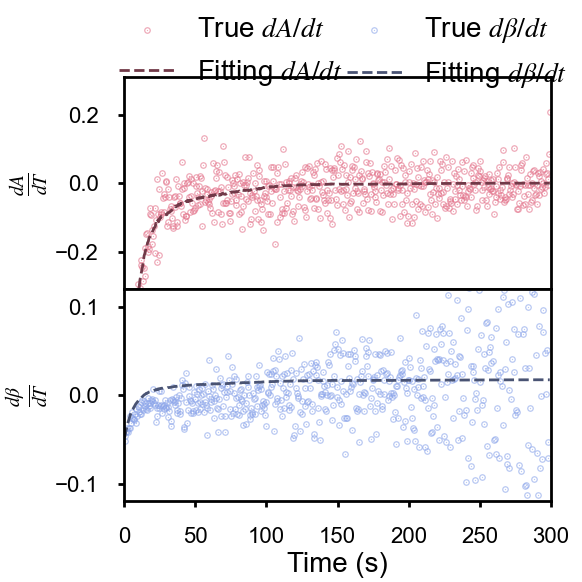

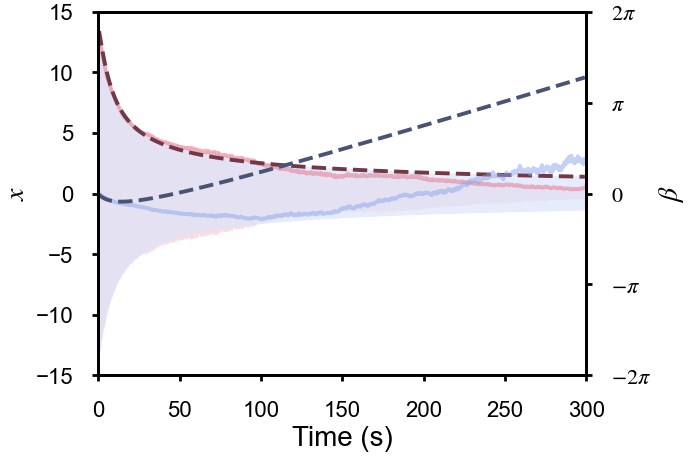

In [11]:
# validate on testing cases from U248 to U 283

summary_info = pd.read_excel("./Data/summary.xlsx")
# Z2S = summary_info[summary_info["Initial displacement (mm)"] == 0]
for i in range(len(Z2S)):
    filename = Z2S["Filename"].iloc[i][:4]
    # print(filename)
    datadir = "./data/%s_B2S.csv"%filename
    frequency_result = frequencys[i]
    Xi_result = Xi[i]
    data = pd.read_csv(datadir)
    t = np.array(data['t'])
    y = np.array(data['x'])
    T = t[-1]
    initial_state = [y[0], 0]
    model = Model.WeakNO(dim,library,library_name)
    model.Get_frequency(y.reshape(-1,1),t)
    # print("Identifed result: %.4f"%(model.frequencys[0]**2))
    model.Get_Evolution(smooth_window = 1,height = 0.01)
    fig,ax = plt.subplots(2,1,figsize = (3.5/2.54,3.5/2.54))
    # ax0 = plt.subplot(221)
    # ax1 = plt.subplot(223)
    # ax = [ax0,ax1]
    plt.subplots_adjust(hspace = 0)
    model.Library_rebuild()
    ax[0].tick_params(direction='out',width = 0.5,length = 1)
    ax[1].tick_params(direction='out',width = 0.5,length = 1)
    ax[0].scatter(model.t_evolutions[:],np.gradient(model.evolutions[0,0,:],dt,edge_order=2)[:], s=0.05,alpha = 0.6,color = color[0],label = r"True $dA/dt$")
    ax[0].plot(model.t_evolutions[:],np.dot(model.Phi[:,0,:,0],Xi_result),  lw = 0.5,alpha = 1,color = color[2],ls = "--",label = r"Fitting $dA/dt$")
    ax[1].scatter(model.t_evolutions[:],np.gradient(model.evolutions[1,0,:],dt,edge_order=2)[:], s=0.05,alpha = 0.6,color = color[1],label = r"True $d\beta/dt$")
    ax[1].plot(model.t_evolutions[:],np.dot(model.Phi[:,1,:,0],Xi_result),  lw = 0.5,alpha = 1,color = color[3],ls = "--",label = r"Fitting $d\beta/dt$")
    ax[0].set_ylim(-.31,.31)
    ax[1].set_ylim(-.12,.12)
    ax[0].set_xlim(0,T)
    ax[1].set_xlim(0,T)
    ax[0].set_ylabel(r"$\frac{dA}{dT}$")
    ax[1].set_ylabel(r"$\frac{d\beta}{dT}$")
    ax[1].set_xlabel("Time (s)")
    ax[0].set_xticks([])
    ax[0].legend(loc="upper center" ,fontsize = 5, bbox_to_anchor = (0.25,1.4))
    ax[1].legend(loc="upper center" ,fontsize = 5, bbox_to_anchor = (0.78,2.41))
    def WND_model(x,t):
        Phi = np.zeros(len(model.library))
        for j in range(len(model.library)):
            Phi[j] = model.library[j](x)
        dxdt = [x[1], -frequency_result**2*x[0]-np.sum(Phi*Xi_result)]
        return dxdt
    WND_predict = odeint(WND_model, y0 = [14,0],t = t) 
    model_GT = Model.WeakNO(dim,library,library_name)
    model_GT.Get_frequency(y.reshape(-1,1),t)
    fre = model_GT.frequencys[0]
    model_GT.Get_Evolution(smooth_window = 1)
    GT_Amplitude = model_GT.evolutions[0,0,:]
    GT_Phase = model_GT.evolutions[1,0,:]
    GT_Phase = GT_Phase - GT_Phase[0]
    GT_evolutions = model_GT.t_evolutions[:]
    model_PRE = Model.WeakNO(dim,library,library_name)
    predict = WND_predict[:,0]
    predict = predict.reshape(-1,1)
    model_PRE.Get_frequency(predict,t)
    model_PRE.frequencys[0] = frequency_result
    # print(fre)
    model_PRE.Get_Evolution(smooth_window = 1)
    
    PRE_Amplitude = model_PRE.evolutions[0,0,:]
    PRE_Phase = model_PRE.evolutions[1,0,:]
    PRE_phase = PRE_Phase - PRE_Phase[0]
    PRE_evolutions = model_PRE.t_evolutions[:]
    fig,ax = plt.subplots(figsize = (4/2.54,3/2.54))
    plt.subplots_adjust(wspace = 0.02)
    ax.tick_params(direction='out',width = 0.5,length = 1)
    
    

    color = ["#E3738B", "#8CA5EA", "#713948", "#495373", "#FFE8CE","#F9D5DD", "#DCE4FA"]
    # ax = axes[0]
    ax2 = ax.twinx()
    ax2.tick_params(direction='out',width = 0.5,length = 1)
    ax.set_ylim(-15,15)
    ax2.set_yticks(np.linspace(-2*np.pi,2*np.pi,5))
    ax2.set_yticklabels([r"$-2\pi$",r'$-\pi$','$0$','$\pi$',r'$2\pi$'])
    ax.set_xlim(0,T)
    ax2.set_ylim(-2*np.pi, 2*np.pi)
    ax.set_xlabel("Time (s)")
    # ax.set_xticks([])
    ax.set_ylabel(r"$x$",color = "black")
    ax2.set_ylabel(r"$\beta$")
    
    
    ln1 = ax.plot(t,y,lw = 0.1,alpha = 0.8,color = color[5],label = "Vibration Ground Truth")
    ln2 = ax.plot(t,predict,lw = 0.1,alpha = 0.7,color = color[6],ls = '-',label = "Vibration Prediction")
    ln3 = ax.plot(GT_evolutions, GT_Amplitude, ls = '-', color = color[0],lw = 0.7, alpha = 0.5,label = "Amplitude Ground Truth")
    ln4 = ax.plot(PRE_evolutions, PRE_Amplitude, ls = '--', color = color[2],lw = 0.7, alpha = 1,label = "Amplitude Prediction")
    # ax.plot(t[:-bias],y_pre[bias:].reshape(-1) - WND_predict[:-bias,0], lw = 0.05,color = 'red')
    # ax.plot([150,150],[-15,15], lw = .5,ls = ':',color = "gray")
    ln5 = ax2.plot(GT_evolutions, GT_Phase, ls = '-', color = color[1],lw = 0.7, alpha = 0.5,label = "Phase Ground Truth")
    ln6 = ax2.plot(PRE_evolutions, PRE_Phase, ls = '--', color = color[3],lw = 0.7, alpha = 1,label = "Phase Prediction")
    lns = ln1 + ln3 + ln5 + ln2 +ln4 + ln6
    labs = [l.get_label() for l in lns]
    plt.savefig("Fig/Vortex induced vibration/%s_TestingGroup.svg"%filename,dpi = 600,transparent = True,bbox_inches="tight")